In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

conn = create_connection('USRent.db')
sql_statement = "select * from HousingList;"
data = pd.read_sql_query(sql_statement, conn)

In [3]:
df = data.copy(deep=True)

In [4]:
data.head()

,listing_id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,location_id,laundry_id,housing_type_id,parking_id
0,7003808130,799,954,2,2.0,1,1,1,0,0,0,170,4,3,7
1,7004010416,1005,1117,2,2.0,1,1,1,0,0,0,212,5,3,1
2,7004032234,750,763,2,2.0,1,1,1,0,0,0,190,3,3,2
3,7004041631,1000,800,1,0.0,0,1,1,0,0,0,373,1,3,2
4,7004048100,530,641,1,1.0,1,1,1,0,0,0,388,5,3,7


In [5]:
data.describe()

,listing_id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


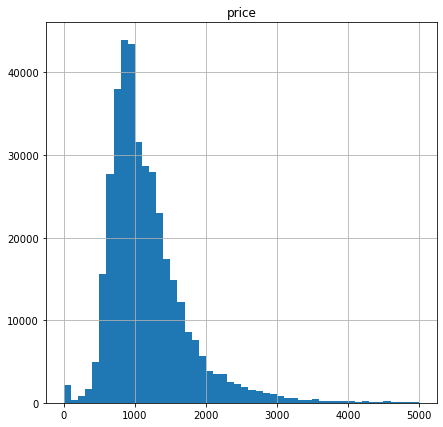

In [6]:
plt = df.hist('price', bins=50, figsize=(7,7),range=[0,5000])

[(0.0, 10000.0)]

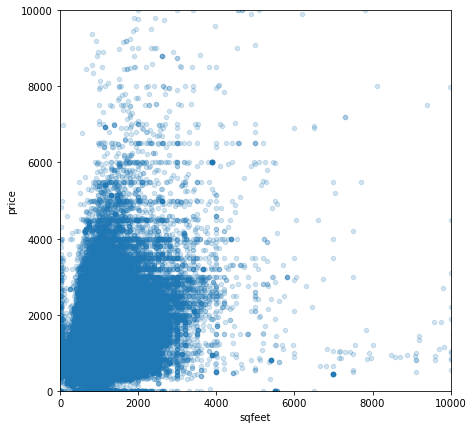

In [7]:
b = df.plot(kind="scatter", x="sqfeet", y="price", alpha=0.2,figsize=(7,7))
b.set(xlim=(0, 10000))
b.set(ylim=(0, 10000))

In [8]:
sql_statement5 = "select beds, count(beds) from HousingList where beds <= 4 group by beds;"
df = pd.read_sql_query(sql_statement5, conn)
display(df)

,beds,count(beds)
0,0,10978
1,1,117226
2,2,175513
3,3,67037
4,4,11575


(-1.1090775909857284,
 1.1300164459019784,
 -1.1274804151182307,
 1.1013085966390581)

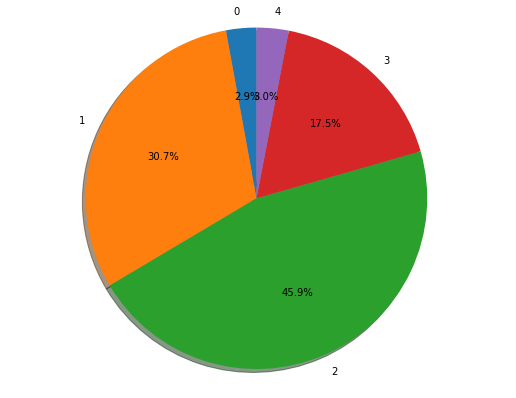

In [11]:
labels = df['beds'].tolist()
sizes = df['count(beds)'].tolist()

fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

In [12]:
sql_statement1 = "select state, avg(price) as price from HousingList hl left join Location l on hl.location_id = l.location_id group by state order by price desc limit 1,5;"
df = pd.read_sql_query(sql_statement1, conn)
display(df)

,state,price
0,ny,5091.215294
1,nc,3283.845072
2,ca,2902.896660
3,fl,2256.002004
4,hi,2150.842935


In [13]:
col = df['state'].tolist()
val = df['price'].tolist()

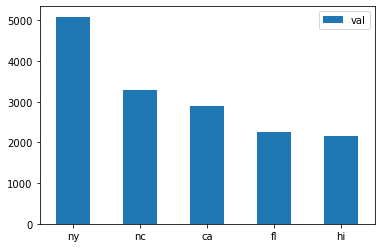

In [14]:
df = pd.DataFrame({'val': val}, index=col)
ax = df.plot.bar(rot=0)

In [15]:
sql_statement2 = "select state, avg(price) as price from HousingList hl left join Location l on hl.location_id = l.location_id group by state order by price limit 1,5;"
df = pd.read_sql_query(sql_statement2, conn)
display(df)

,state,price
0,ks,748.084450
1,mo,815.394347
2,sd,837.749158
3,ky,862.584056
4,ar,865.076850


In [16]:
col = df['state'].tolist()
val = df['price'].tolist()

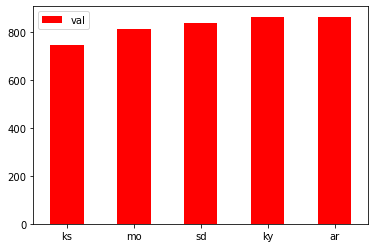

In [17]:
df = pd.DataFrame({'val': val}, index=col) 
ax = df.plot.bar(rot=0,color = "red")